# UKF Paper plots

This workbook generates all of the plots that are included in the UKF paper.

Results of the experiments should have been created already and placed in the [ukf_results](./ukf_results) folder. Re-running the experiments can take ages, so there are some pre-prepared results that can be downloaded separately; see [ukf_results/README.md](ukf_results/README.md)


In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sys import path
path.append('../..')
path.append('../../stationsim')

from base_config_depickle import base_data_parser,plot_1,plot_2

from stationsim.ukf import plots
from arc_ukf_depickle import *
from arc_ukf_grand_depickle import *


from stationsim.ukf_aggregate import *


from IPython.display import Video


## Experiment 0

This reads the results from the [ukf_results](ukf_results) directory. If there are no results in there then it will throw an error (see above for instructions about how to generate results).

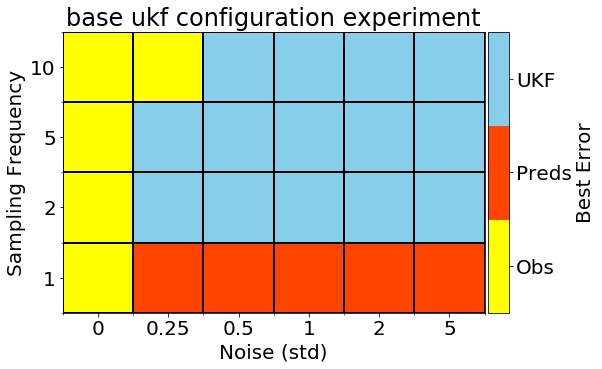

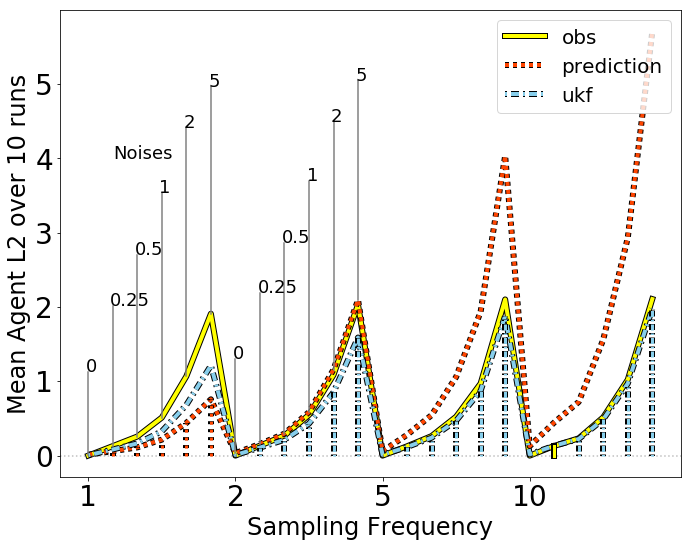

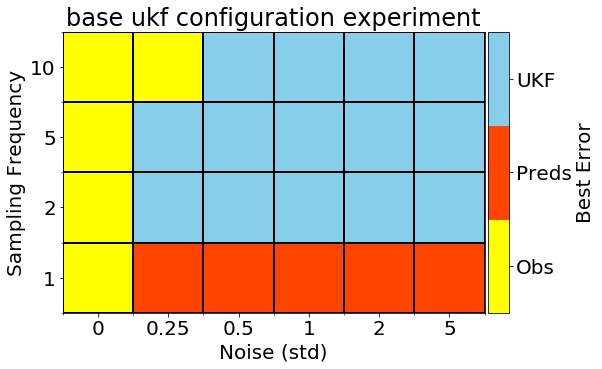

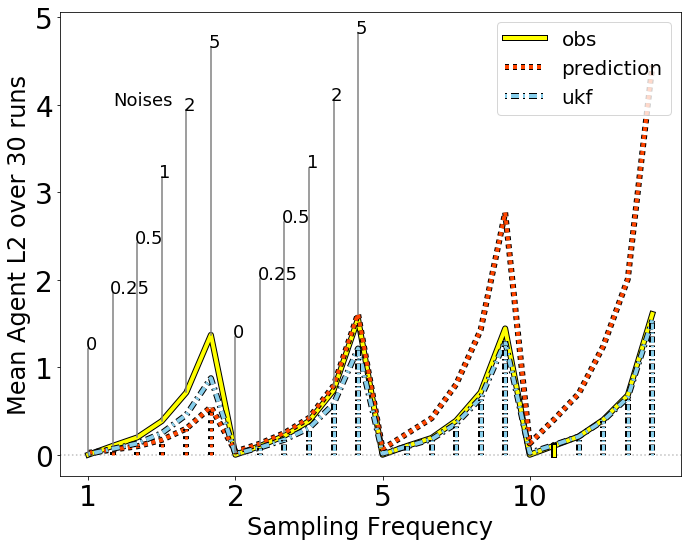

In [15]:
pops =[10,30]#populations 10 and 30
#rates = [1,2,5,10,20,50] #.2 to 1 by .2
rates = [1,2,5,10] #.2 to 1 by .2
noises = [0,0.25,0.5,1,2,5]
run_id = np.arange(0,30,1) #20 runs
plot1 =True #do plot 1
plot2 = True # do plot2
save =False # save plots
for n in pops:
    data2,best_array = base_data_parser(n,rates,noises,run_id)

    if plot_1:
        plot_1(data2,best_array,n,rates,noises,save)
    if plot_2:
        plot_2(data2,best_array,n,rates,noises,save)


## Experiment 1

Read the data

In [28]:
n = 30
prop = 0.5 
noise = 0.5

file_name = f"test_ukf_pickle_{n}_{prop}_{noise}"
f = open(file_name,"rb")
u = pickle.load(f)
f.close()

### Experiment 1 snapshot

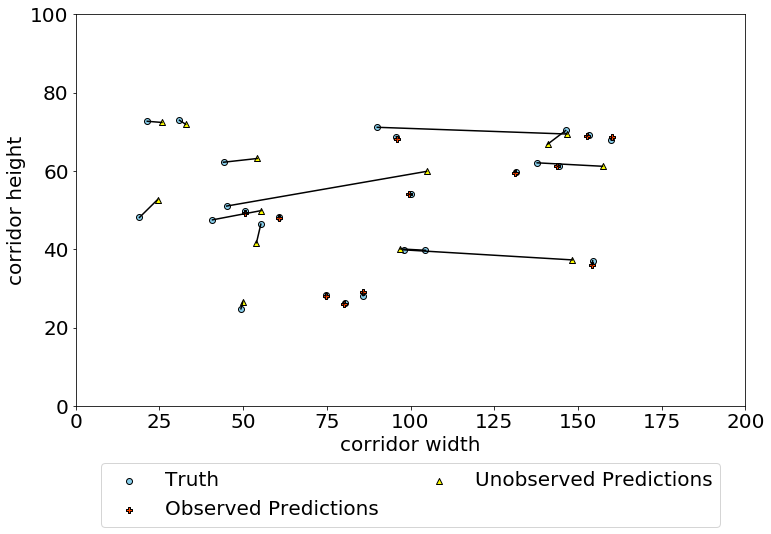

In [18]:
obs,preds,full_preds,truth,nan_array= u.data_parser(True)
#truth[np.isnan(obs)]=np.nan #keep finished agents from skewing mean down
preds[~nan_array]=np.nan #kill wierd tails of finished agents (remove this and see what happens)
full_preds[~nan_array]=np.nan #kill wierd tails of finished agents (remove this and see what happens)
truth[~nan_array]=np.nan
plts = plots(u)
plot_save=False

"initial snapshot"
plts.pair_frames_single(truth,full_preds,100)
 



### Full diagnostic plots. 

Only histograms are used for paper

(_maybe worth removing the fluff_)

../../stationsim/ukf.py:556: RuntimeWarning: Mean of empty slice
  time_means = np.nanmean(c,axis=1)


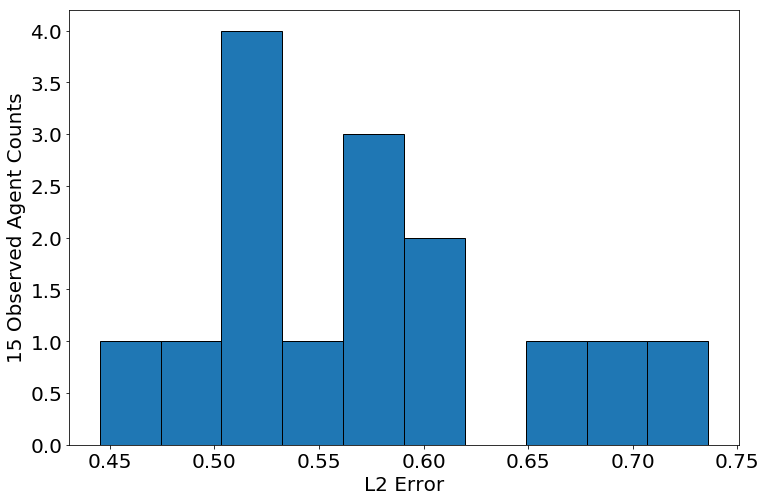

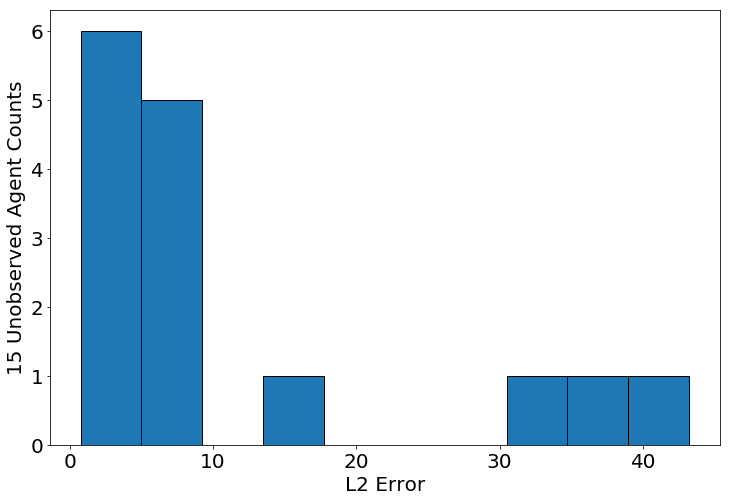

In [19]:


distances2,t_mean2 = plts.diagnostic_plots(truth,preds,True,plot_save)
if u.filter_params["prop"]<1: #histograms for observed and unobserved
    distances,t_mean = plts.diagnostic_plots(truth,preds,False,plot_save)


### Box plots and discrete grids for median agents l2 errors

../../stationsim/ukf.py:556: RuntimeWarning: Mean of empty slice
  time_means = np.nanmean(c,axis=1)
/Users/nick/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/nick/gp/dust/Projects/ABM_DA/experiments/ukf_experiments/arc_ukf_grand_depickle.py:138: RuntimeWarning: Mean of empty slice
  u_L2[i,k]=np.nanmean(np.hstack(u_L2_2))


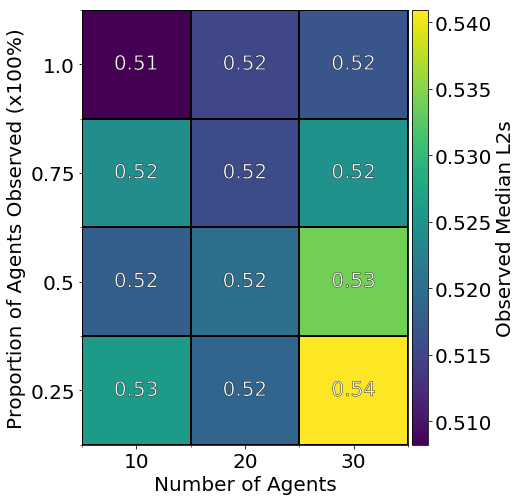

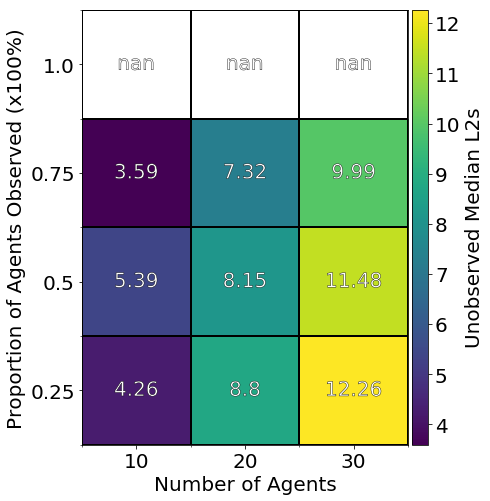

In [21]:

n=[10,20,30]
plot1 = True
plot2 = True
n= [10,20,30]
prop = [0.25,0.5,0.75,1.0]

save=True
if plot1:
    O,U = grand_L2_matrix(n,prop)
    grand_L2_plot(O,n,prop,True,save)
    grand_L2_plot(U,n,prop,False,save)


/Users/nick/anaconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/shape_base.py:380: RuntimeWarning: Mean of empty slice
  res = asanyarray(func1d(inarr_view[ind0], *args, **kwargs))


<Figure size 432x288 with 0 Axes>

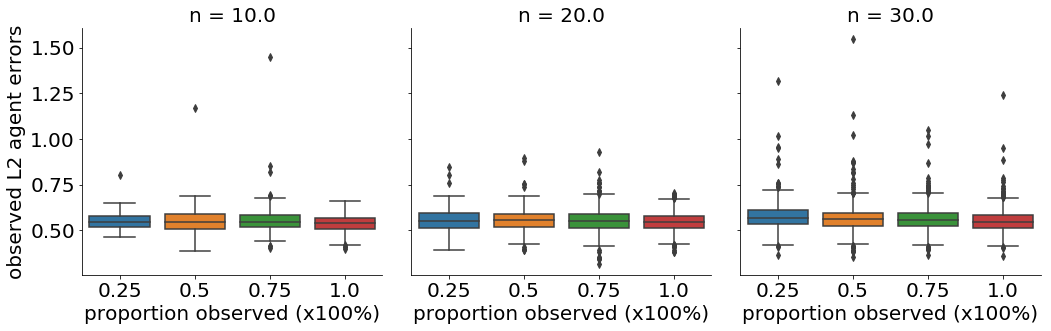

<Figure size 432x288 with 0 Axes>

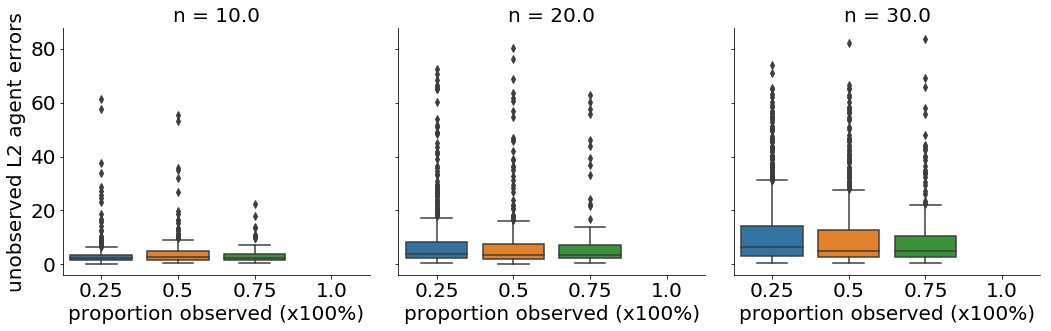

In [22]:
if plot2:
    obs_frame ,uobs_frame = boxplot_parser(n,prop)
    boxplot_plots(n,prop,obs_frame,False,True,save)        
    boxplot_plots(n,prop,uobs_frame,False,False,save)

## Experiment 2

### Experiment 2 snapshot

In [2]:
n = 30
noise= 0.5 
bin_size = 25
plot_save = False

file_name = f"test_agg_ukf_pickle_{n}_{bin_size}_{noise}"
f = open(file_name,"rb")
uagg = pickle.load(f)
f.close()
filter_params = uagg.filter_params

obs,preds,full_preds,truth,nan_array= uagg.data_parser(True)
truth[~nan_array]=np.nan
preds[~nan_array]=np.nan
full_preds[~nan_array]=np.nan

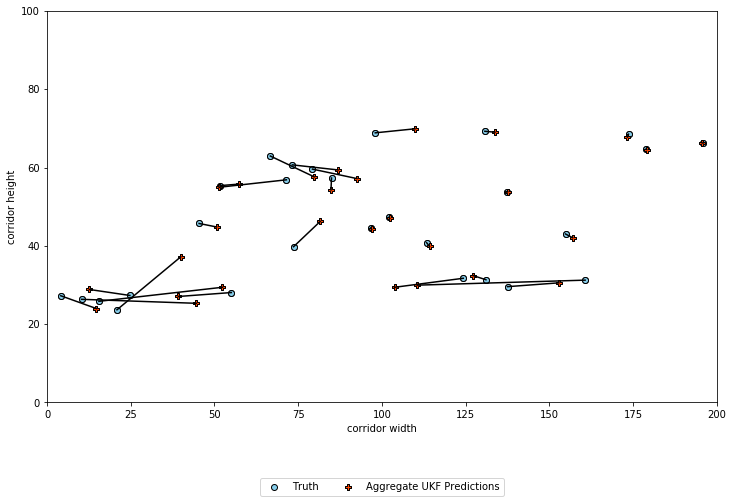

In [3]:
agg_plts = agg_plots(uagg)

frame_number = 100 #which frame to take snapshot of
if uagg.filter_params["sample_rate"]>1:
    agg_plts.pair_frames_single(truth,full_preds,frame_number)
else:
    agg_plts.pair_frames_single(truth,preds,frame_number)

### Experiment 2 heatmap

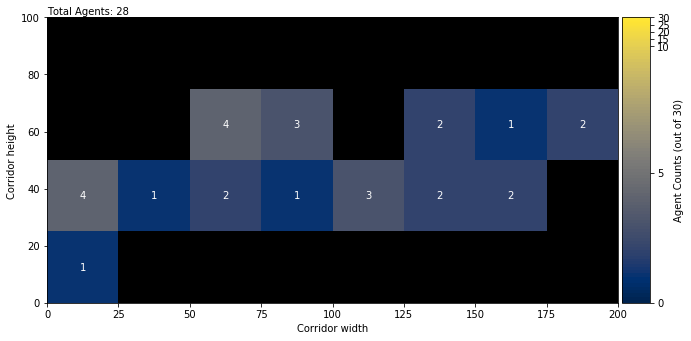

In [5]:
poly_list =uagg.poly_list #generic square grid over corridor

agg_plts.heatmap_single(obs,poly_list,100)

### Experiment 2 histograms

../../stationsim/ukf_aggregate.py:783: RuntimeWarning: Mean of empty slice
  time_means = np.nanmean(c,axis=1)


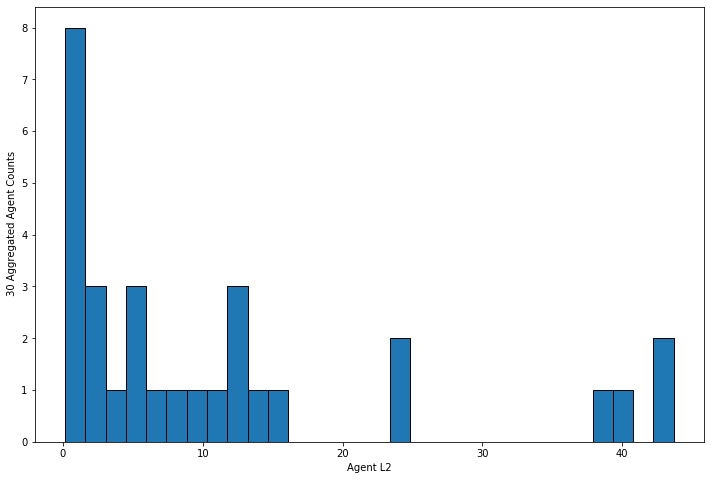

In [6]:
distances,t_mean = agg_plts.agg_diagnostic_plots(truth,preds,plot_save)


### Boxplot and discrete l2 grid

../../stationsim/ukf.py:556: RuntimeWarning: Mean of empty slice
  time_means = np.nanmean(c,axis=1)
../../stationsim/ukf.py:556: RuntimeWarning: Mean of empty slice
  time_means = np.nanmean(c,axis=1)


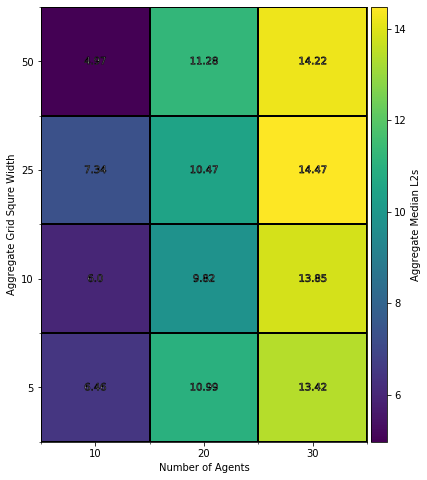

<Figure size 432x288 with 0 Axes>

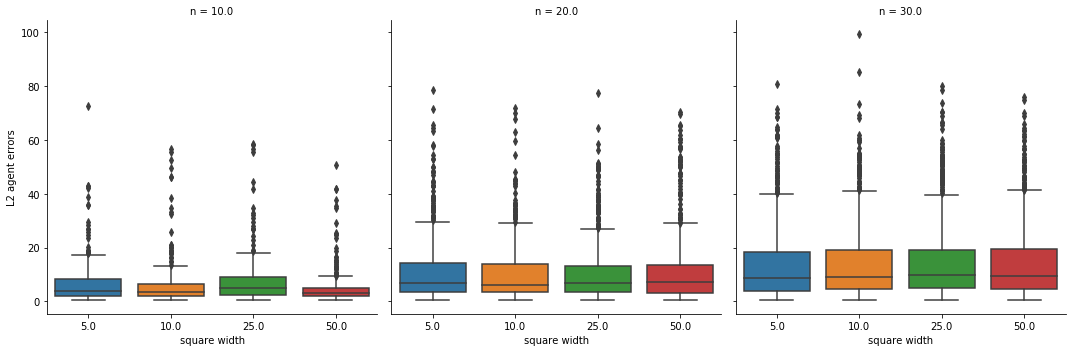

In [7]:

from arc_ukf_agg_grand_depickle import *

plot1 = True
plot2 = True

n=[10,20,30]
bin_size = [5,10,25,50]

save=True
if plot1:
    L2 = grand_L2_matrix(n,bin_size)
    grand_L2_plot(L2,n,bin_size,True,save)
if plot2:
    frame = boxplot_parser(n,bin_size)
    boxplot_plots(n,bin_size,frame,False,save)        